In [ ]:
"""
任意の境界条件を設定
あちあち100℃の肉(球体)を少しずつ冷ましていく。
"""

In [368]:
import numpy as np

In [428]:
#定数
kappa = 1.1e-8         # [m2/s]拡散係数
temp_init = 100.0       # [C]初期肉温度
rmax = 4 * 0.01 * 0.5  # half-diameter [m]　肉の厚さ
a_factor = 2        # 0 for slab, 1 for cylinder, 2 for sphere

tmax = 400.0 * 1.5 * (rmax / 0.005) ** 2 #肉を焼く時間
delta_t = 0.1 * (rmax / 0.005) ** 2 #時間のGrid数
delta_r = rmax / 25.0 #rのgrid分割
nr = int(rmax / delta_r) #rのgrid数
nstep = int(tmax / delta_t) #tのgrid数
#plot_intvl = 200　

In [429]:
#グリッド作成
r = np.linspace(0, rmax, nr, endpoint=True) - delta_r / 2
dtdt = np.empty((nr,))
temperature = np.full((nr,), temp_init)

In [430]:
#[C]初期境界条件
temp_boundary = 100 
temperature[-1] = temp_boundary  # outer boundary condition
dtdt[-1] = 0.0     # outer boundary condition (constant)

In [431]:
#微分方程式の定義
def time_derivative(temperature):
    dtdt[1:-1] = kappa * \
        ((temperature[2:] - 2.0 * temperature[1:-1] + temperature[0:-2]) / (delta_r * delta_r) \
         + a_factor / r[1:-1] * (temperature[2:] - temperature[0:-2]) / (2 * delta_r))
    dtdt[0] = dtdt[1]  # inner boundary condition temperature[0] = temperature[1]
    return dtdt

In [432]:
#実行部分
T_list = temperature
for i in range(nstep): 
    temp_boundary = temp_init - 0.01*i*delta_t　#一定時間で表面の温度を下げる
    temperature[-1] = temp_boundary　#一定時間で表面の温度を下げる
    #if (i % plot_intvl == 0):
    #    plot_snap(temperature, i)
    #np.append(dtdt, time_derivative(temperature), axis=0)
    dtdt = time_derivative(temperature)
    temperature[:] = temperature[:] + delta_t * dtdt[:]
    T_list = np.append(T_list, temperature,).reshape(i+2,nr)
    #temperature_all = np.append(temperature_all, temperature, axis=0)
    #temperature_all[i] = temperature_all.append(temperature:])

type(fig): <class 'matplotlib.figure.Figure'>


C:\Users\ayana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


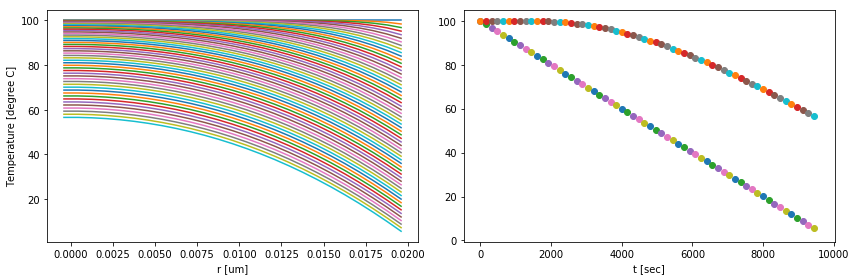

In [478]:
#graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4)) 
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(122)

#3 データを渡してプロット
Ngraph = 100
for i in range(int(nstep/Ngraph)):
    ax1.plot(r, T_list[Ngraph*i], label='')
for i in range(int(nstep/Ngraph)):
    ax2.scatter(i/(nstep/Ngraph)*tmax, T_list[Ngraph*i][-1], label='')
    ax3.scatter(i/(nstep/Ngraph)*tmax, T_list[Ngraph*i][0], label='')

ax1.set_xlabel("r [um]")
ax1.set_ylabel("Temperature [degree C]")
ax2.set_xlabel("t [sec]")
ax1.set_ylabel("Temperature [degree C]")

#ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)

In [436]:
T_list[30]

array([100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
        99.99999996,  99.99999938,  99.99999254,  99.99992365,
        99.99934046,  99.99526043,  99.97217723,  99.86936722,
        99.536     ])

In [461]:
T_list.shape

(6001, 25)